<a href="https://colab.research.google.com/github/fiapdatanalytics/tech-challenge4/blob/main/Tech_Challenge_4_Data_viz_and_production_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tech Challenge 4 - Data viz and production models**

## **Desafio**

🎯 Objetivo do Projeto

Desenvolver um modelo preditivo de Machine Learning para auxiliar uma equipe médica a diagnosticar níveis de nivel_obesidade em pacientes, com assertividade mínima de 75%, deployado em uma aplicação Streamlit, acompanhado de dashboard analítico e vídeo de apresentação.

🧩 Entregáveis Principais

* Pipeline de Machine Learning
* Feature engineering, treinamento e avaliação do modelo.
* Modelo com acurácia ≥ 75%
* Deploy no Streamlit
* Aplicação funcional acessível por link público.
* Dashboard analítico
* Visualização dos principais insights.
* Documentação (.doc ou .txt)
* Links do app, dashboard e repositório GitHub.
* Vídeo de apresentação (4 a 10 minutos)


# **Bibliotecas**

In [250]:
import pandas as pd
import re
import json
import seaborn as sns
import matplotlib.pyplot as plt


# **Dicionário de Dados**

* **Gender:** Gênero.
* **Age:** Idade.
* **Height:** Altura em metros.
* **Weight:** Peso em kgs.
* **family_history:** Algum membro da família sofreu ou sofre de excesso de
peso?
* **FAVC:** Você come alimentos altamente calóricos com frequência?
* **FCVC:** Você costuma comer vegetais nas suas refeições?
* **NCP:** Quantas refeições principais você faz diariamente?
* **CAEC:** Você come alguma coisa entre as refeições?
* **SMOKE:** Você fuma?
* **CH2O:** Quanta água você bebe diariamente?
* **SCC:** Você monitora as calorias que ingere diariamente?
* **FAF:** Com que frequência você pratica atividade física?
* **TER:** Quanto tempo você usa dispositivos tecnológicos como celular,
videogame, televisão, computador e outros?
* **CALC:** Com que frequência você bebe álcool?
* **MTRANS:** Qual meio de transporte você costuma usar?
* **Obesity_level (coluna alvo):** Nível de nivel_obesidade

In [251]:
dicionario_dados = {
    'genero': {
        'nome_original': 'Gender',
        'new_name': 'genero',
        'descricao': 'Genero.',
        'transformacao': 'Mapeado para 0 (Female) e 1 (Male).'
    },
    'idade': {
        'nome_original': 'Age',
        'new_name': 'idade',
        'descricao': 'Idade.',
        'transformacao': 'Nenhuma (Tipo float64 mantido).'
    },
    'altura': {
        'nome_original': 'Height',
        'nome_novo': 'altura',
        'descricao': 'Altura em metros.',
        'transformacao': 'Nenhuma (Tipo float64 mantido).'
    },
    'peso': {
        'nome_original': 'Weight',
        'new_name': 'peso',
        'descricao': 'Peso em kgs.',
        'transformacao': 'Nenhuma (Tipo float64 mantido).'
    },
    'historico_familiar': {
        'nome_original': 'family_history',
        'new_name': 'historico_familiar',
        'descricao': 'Algum membro da família sofreu ou sofre de excesso de peso?',
        'transformacao': 'Mapeado para 0 (no) e 1 (yes).'
    },
    'favc': {
        'nome_original': 'FAVC',
        'new_name': 'favc',
        'descricao': 'Voce come alimentos altamente calóricos com frequencia?',
        'transformacao': 'Nenhuma (Tipo object mantido).'
    },
    'fcvc': {
        'nome_original': 'FCVC',
        'new_name': 'fcvc',
        'descricao': 'Voce costuma comer vegetais nas suas refeicoes?',
        'transformacao': 'Nenhuma (Tipo float64 mantido).'
    },
    'ncp': {
        'nome_original': 'NCP',
        'new_name': 'ncp',
        'descricao': 'Quantas refeicoes principais voce faz diariamente?',
        'transformacao': 'Nenhuma (Tipo float64 mantido).'
    },
    'caec': {
        'nome_original': 'CAEC',
        'new_name': 'caec',
        'descricao': 'Voce come alguma coisa entre as refeicoes?',
        'transformacao': 'Mapeado para 0 (no), 1 (Sometimes), 2 (Frequently), 3 (Always).'
    },
    'fumante': {
        'nome_original': 'SMOKE',
        'new_name': 'fumante',
        'descricao': 'Voce fuma?',
        'transformacao': 'Mapeado para 0 (no) e 1 (yes).'
    },
    'ch20': {
        'nome_original': 'CH2O',
        'new_name': 'ch20',
        'descricao': 'Quanta água voce bebe diariamente?',
        'transformacao': 'Nenhuma (Tipo float64 mantido).'
    },
    'scc': {
        'nome_original': 'SCC',
        'new_name': 'scc',
        'descricao': 'Voce monitora as calorias que ingere diariamente?',
        'transformacao': 'Mapeado para 0 (no) e 1 (yes).'
    },
    'faf': {
        'nome_original': 'FAF',
        'new_name': 'faf',
        'descricao': 'Com que frequencia voce pratica atividade fisica?',
        'transformacao': 'Nenhuma (Tipo float64 mantido).'
    },
    'tue': {
        'nome_original': 'TUE',
        'new_name': 'tue',
        'descricao': 'Quanto tempo voce usa dispositivos tecnológicos como celular, videogame, televisao, computador e outros?',
        'transformacao': 'Nenhuma (Tipo float64 mantido).'
    },
    'calc': {
        'nome_original': 'CALC',
        'new_name': 'calc',
        'descricao': 'Com que frequencia voce bebe alcool?',
        'transformacao': 'Mapeado para 0 (no), 1 (Sometimes), 2 (Frequently), 3 (Always).'
    },
    'mtrans': {
        'nome_original': 'MTRANS',
        'new_name': 'mtrans',
        'descricao': 'Qual meio de transporte voce costuma usar?',
        'transformacao': 'Mapeado para 0 (Public_Transportation), 1 (Walking), 2 (Automobile), 3 (Motorbike), 4 (Bike).'
    },
    'nivel_obesidade': {
        'nome_original': 'Obesity',
        'new_name': 'nivel_obesidade',
        'descricao': 'Nivel de obesidade',
        'transformacao': "Mapeado para 'peso_normal', 'sobrepeso_tipo_1', 'sobrepeso_tipo_2', 'nivel_obesidade_tipo_1', 'peso_insuficiente', 'nivel_obesidade_tipo_2', 'nivel_obesidade_tipo_3'."
    },
     'imc': {
        'nome_original': None, #IMC was created
        'new_name': 'imc',
        'descricao': 'Indice de Massa Corporal.',
        'transformacao': 'Calculado a partir de peso / (altura * altura).'
    }
}
#Exibir o dicionário
#print(json.dumps(dicionario_dados, indent=4))


# **Funções**

## **Renomear Colunas**

In [252]:
def renomear_colunas(df: pd.DataFrame, mapa_renomeacao: dict = None) -> None: # Retorna None pois modifica in-place
    """
    Renomeia as colunas de um DataFrame utilizando um dicionário fornecido
    ou aplicando um padrão de formatação (minúsculas, espaços por '_').
    Se o padrão de formatação for aplicado, o dicionário de mapeamento gerado
    é salvo em um arquivo JSON chamado 'renaming_map_pattern.json'.

    Args:
        df (pd.DataFrame): O DataFrame cujas colunas serão renomeadas.
        mapa_renomeacao (dict, optional): Um dicionário mapeando nomes de colunas originais para novos nomes.
                                         Se None, um padrão de formatação será aplicado.
    """
    colunas_originais = df.columns.tolist()
    num_linhas_antes, num_colunas_antes = df.shape

    print("Número de linhas e colunas antes da transformação:")
    print(f"Linhas: {num_linhas_antes}, Colunas: {num_colunas_antes}")
    print(f"\nNomes das colunas originais:\n{colunas_originais}\n")

    try:
        if mapa_renomeacao:
            # Verificar se o dicionário fornecido tem chaves que correspondem às colunas do DataFrame
            if any(col in mapa_renomeacao for col in colunas_originais):
                df.rename(columns=mapa_renomeacao, inplace=True) # Modifica in-place
                print("Utilizado dicionário de renomeação fornecido.")
            else:
                print("Dicionário de renomeação fornecido, mas nenhuma chave corresponde às colunas existentes.")
                print("Aplicando padrão de formatação como alternativa.")
                # Aplicar padrão se o dicionário não corresponder
                mapa_nova_coluna = {}
                nova_coluna = []
                for col in colunas_originais:
                    col_caixa_baixa = col.lower()
                    col_limpa = col_caixa_baixa.strip()
                    col_formatada = re.sub(r'\s+', '_', col_limpa)
                    nova_coluna.append(col_formatada)
                    mapa_nova_coluna[col] = col_formatada # Store mapping
                df.columns = nova_coluna # Modifica in-place
                print("Padrão de formatação aplicado.")
                # Save generated map to JSON
                with open(f'mapeamento_coluna_{df}.json', 'w') as f:
                    json.dump(mapa_nova_coluna, f, indent=4)
                print(f"Dicionário de renomeação gerado pelo padrão salvo em f'mapeamento_coluna_{df}.json'.")
        else:
            # Aplicar padrão de formatação se nenhum dicionário for fornecido
            print("Nenhum dicionário de renomeação fornecido. Aplicando padrão de formatação.")
            mapa_nova_coluna = {}
            nova_coluna = []
            for col in colunas_originais:
                col_caixa_baixa = col.lower()
                col_limpa = col_caixa_baixa.strip()
                col_formatada = re.sub(r'\s+', '_', col_limpa)
                nova_coluna.append(col_formatada)
                mapa_nova_coluna[col] = col_formatada # Store mapping
            df.columns = nova_coluna # Modifica in-place
            print("Padrão de formatação aplicado.")
            # Save generated map to JSON
            with open(f'mapeamento_coluna_{df}.json', 'w') as f:
                json.dump(mapa_nova_coluna, f, indent=4)
            print(f"Dicionário de renomeação gerado pelo padrão salvo em f'mapeamento_coluna_{df}.json'.")


        colunas_modificadas = df.columns.tolist()
        num_linhas_depois, num_colunas_depois = df.shape

        print(f"\nNomes das colunas modificadas:\n{colunas_modificadas}\n")
        print("Número de linhas e colunas após a transformação:")
        print(f"Linhas: {num_linhas_depois}, Colunas: {num_colunas_depois}")

    except NameError as e:
        print(f"Ocorreu um erro de nome ao renomear as colunas: {e}")
    except Exception as e: # Mantendo um except geral para outros tipos de erro inesperados
        print(f"Ocorreu um erro inesperado ao renomear as colunas: {e}")

## **Transforma Coluna Categórica**

In [253]:
def codificar_coluna_categorica(df: pd.DataFrame, coluna: str, transformacoes_categoricas: list):
    """
    Transforma os valores únicos de uma coluna do tipo 'object' em números inteiros,
    reutilizando mapeamentos existentes para conjuntos idênticos de valores únicos
    e armazenando novos mapeamentos.

    Args:
        df (pd.DataFrame): O DataFrame a ser modificado.
        coluna (str): O nome da coluna a ser codificada.
        transformacoes_categoricas (list): Uma lista de dicionários contendo mapeamentos de transformações já realizadas.
    """
    if coluna not in df.columns:
        print(f"Erro: A coluna '{coluna}' não existe no DataFrame.")
        return

    if df[coluna].dtype != 'object':
        print(f"A coluna '{coluna}' não é do tipo 'object'. Nenhuma codificação será aplicada.")
        return

    try:
        # Contar valores nulos antes da transformação
        nulos_antes = df[coluna].isnull().sum()

        # Obter e imprimir valores únicos e contagem antes da transformação
        print(f"Valores únicos e contagem antes da codificação para a coluna '{coluna}':")
        display(df[coluna].value_counts())

        # Obter valores únicos da coluna atual, excluindo nulos e ordenando para comparação consistente
        valores_unicos_atuais = sorted(df[coluna].dropna().unique().tolist())

        # Verificar se existe um mapeamento correspondente na lista de transformações
        mapa_encontrado = None
        for trans in transformacoes_categoricas:
            if sorted(trans['valores_originais']) == valores_unicos_atuais:
                mapa_encontrado = trans['mapa']
                print(f"Utilizando mapeamento existente para a coluna '{coluna}'.")
                break

        if mapa_encontrado:
            mapa_codificacao = mapa_encontrado
        else:
            # Criar um novo mapa de transformação se nenhum for encontrado
            mapa_codificacao = {valor: i for i, valor in enumerate(valores_unicos_atuais)}
            # Armazenar o novo mapeamento na lista de transformações
            transformacoes_categoricas.append({
                'valores_originais': valores_unicos_atuais,
                'mapa': mapa_codificacao
            })
            print(f"Criando novo mapeamento para a coluna '{coluna}'.")


        # Imprimir o mapa de codificação utilizado
        print(f"\nMapeamento aplicado para a coluna '{coluna}':")
        print(mapa_codificacao)

        # Contar linhas antes da alteração
        linhas_antes = df.shape[0]

        # Aplicar a codificação
        df[coluna] = df[coluna].map(mapa_codificacao)

        # Contar linhas após a alteração (devem ser as mesmas, mas é bom para verificar)
        linhas_depois = df.shape[0]
        linhas_alteradas = linhas_antes # Neste caso, todas as linhas da coluna são "alteradas" pelo mapeamento


        # Verificar se surgiram nulos inesperados
        nulos_depois = df[coluna].isnull().sum()
        if nulos_depois > nulos_antes:
            print(f"Aviso: A transformação da coluna '{coluna}' resultou em {nulos_depois - nulos_antes} valores nulos inesperados.")
            print("Verifique o mapa de codificação ou os valores originais na coluna.")

        print(f"\nColuna '{coluna}' codificada com sucesso.")
        print(f"Tipo de alteração: Mapeamento de valores únicos para inteiros.")
        print(f"Número de linhas processadas: {linhas_alteradas}")

        # Obter e imprimir valores únicos e contagem depois da transformação
        print(f"\nValores únicos e contagem depois da codificação para a coluna '{coluna}':")
        display(df[coluna].value_counts())

    except Exception as e:
        print(f"Ocorreu um erro ao codificar a coluna '{coluna}': {e}")

## **Análisar Colunas do Tipo 'object' em um DataFrame**

In [254]:
def analisar_colunas_objeto(df: pd.DataFrame):
    """
    Identifica e analisa colunas do tipo 'object' em um DataFrame.

    Args:
        df (pd.DataFrame): O DataFrame a ser analisado.
    """
    objetos_colunas = df.select_dtypes(include='object').columns
    print("Colunas do tipo 'object' restantes:")
    print(objetos_colunas)

    # Analizando valores unicos para cada coluna
    for col in objetos_colunas:
        print(f"\nValores únicos para a coluna '{col}':")
        display(df[col].unique())
        print(f"Contagem de valores para a coluna '{col}':")
        display(df.groupby(col).size())

## **Histograma**

In [255]:
def gera_histograma(df: pd.DataFrame, coluna: str, titulo: str):
    """
    Gera um histograma para uma coluna específica de um DataFrame.

    Args:
        df (pd.DataFrame): O DataFrame contendo os dados.
        coluna (str): O nome da coluna para gerar o histograma.
        titulo (str): O título do gráfico.
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=coluna, kde=True)
    plt.title(titulo)
    plt.xlabel(coluna)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel("Frequência")
    plt.show()

# **Dados**

In [256]:
# importando a base de dados Obesity.csv
df = pd.read_csv('https://raw.githubusercontent.com/fiapdatanalytics/tech-challenge4/refs/heads/main/data/Obesity.csv')

In [257]:
# visualização dos 5 primeiros registros da base
df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

# **Feature Engeneering**

## **Alteração Nomes Colunas**

In [259]:
colunas_originais = df.columns
mapa_colunas = {
    'Gender': 'genero',
    'Age': 'idade',
    'Height': 'altura',
    'Weight': 'peso',
    'family_history': 'historico_familiar',
    'FAVC': 'favc',
    'FCVC': 'fcvc',
    'NCP': 'ncp',
    'CAEC': 'caec',
    'SMOKE': 'fumante',
    'CH2O': 'ch20',
    'SCC' : 'scc',
    'FAF': 'faf',
    'TUE': 'tue',
    'CALC': 'calc',
    'MTRANS': 'mtrans',
    'Obesity': 'classificacao_peso_corporal'
}


In [260]:
renomear_colunas(df, mapa_colunas)

Número de linhas e colunas antes da transformação:
Linhas: 2111, Colunas: 17

Nomes das colunas originais:
['Gender', 'Age', 'Height', 'Weight', 'family_history', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'Obesity']

Utilizado dicionário de renomeação fornecido.

Nomes das colunas modificadas:
['genero', 'idade', 'altura', 'peso', 'historico_familiar', 'favc', 'fcvc', 'ncp', 'caec', 'fumante', 'ch20', 'scc', 'faf', 'tue', 'calc', 'mtrans', 'classificacao_peso_corporal']

Número de linhas e colunas após a transformação:
Linhas: 2111, Colunas: 17


## **Verificação valores colunas**

In [261]:
analisar_colunas_objeto(df)

Colunas do tipo 'object' restantes:
Index(['genero', 'historico_familiar', 'favc', 'caec', 'fumante', 'scc',
       'calc', 'mtrans', 'classificacao_peso_corporal'],
      dtype='object')

Valores únicos para a coluna 'genero':


array(['Female', 'Male'], dtype=object)

Contagem de valores para a coluna 'genero':


,0
genero,
Female,1043
Male,1068



Valores únicos para a coluna 'historico_familiar':


array(['yes', 'no'], dtype=object)

Contagem de valores para a coluna 'historico_familiar':


,0
historico_familiar,
no,385
yes,1726



Valores únicos para a coluna 'favc':


array(['no', 'yes'], dtype=object)

Contagem de valores para a coluna 'favc':


,0
favc,
no,245
yes,1866



Valores únicos para a coluna 'caec':


array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

Contagem de valores para a coluna 'caec':


,0
caec,
Always,53
Frequently,242
Sometimes,1765
no,51



Valores únicos para a coluna 'fumante':


array(['no', 'yes'], dtype=object)

Contagem de valores para a coluna 'fumante':


,0
fumante,
no,2067
yes,44



Valores únicos para a coluna 'scc':


array(['no', 'yes'], dtype=object)

Contagem de valores para a coluna 'scc':


,0
scc,
no,2015
yes,96



Valores únicos para a coluna 'calc':


array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object)

Contagem de valores para a coluna 'calc':


,0
calc,
Always,1
Frequently,70
Sometimes,1401
no,639



Valores únicos para a coluna 'mtrans':


array(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike',
       'Bike'], dtype=object)

Contagem de valores para a coluna 'mtrans':


,0
mtrans,
Automobile,457
Bike,7
Motorbike,11
Public_Transportation,1580
Walking,56



Valores únicos para a coluna 'classificacao_peso_corporal':


array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

Contagem de valores para a coluna 'classificacao_peso_corporal':


,0
classificacao_peso_corporal,
Insufficient_Weight,272
Normal_Weight,287
Obesity_Type_I,351
Obesity_Type_II,297
Obesity_Type_III,324
Overweight_Level_I,290
Overweight_Level_II,290


# **Transformações variáveis**

## **Transformação das Variáveis categóricas**

In [262]:
transformacoes_categoricas = []
colunas_para_codificar = ['genero', 'historico_familiar', 'favc', 'caec', 'fumante', 'scc','calc', 'mtrans']

for coluna in colunas_para_codificar:
    codificar_coluna_categorica(df, coluna, transformacoes_categoricas)

Valores únicos e contagem antes da codificação para a coluna 'genero':


,count
genero,
Male,1068
Female,1043


Criando novo mapeamento para a coluna 'genero'.

Mapeamento aplicado para a coluna 'genero':
{'Female': 0, 'Male': 1}

Coluna 'genero' codificada com sucesso.
Tipo de alteração: Mapeamento de valores únicos para inteiros.
Número de linhas processadas: 2111

Valores únicos e contagem depois da codificação para a coluna 'genero':


,count
genero,
1,1068
0,1043


Valores únicos e contagem antes da codificação para a coluna 'historico_familiar':


,count
historico_familiar,
yes,1726
no,385


Criando novo mapeamento para a coluna 'historico_familiar'.

Mapeamento aplicado para a coluna 'historico_familiar':
{'no': 0, 'yes': 1}

Coluna 'historico_familiar' codificada com sucesso.
Tipo de alteração: Mapeamento de valores únicos para inteiros.
Número de linhas processadas: 2111

Valores únicos e contagem depois da codificação para a coluna 'historico_familiar':


,count
historico_familiar,
1,1726
0,385


Valores únicos e contagem antes da codificação para a coluna 'favc':


,count
favc,
yes,1866
no,245


Utilizando mapeamento existente para a coluna 'favc'.

Mapeamento aplicado para a coluna 'favc':
{'no': 0, 'yes': 1}

Coluna 'favc' codificada com sucesso.
Tipo de alteração: Mapeamento de valores únicos para inteiros.
Número de linhas processadas: 2111

Valores únicos e contagem depois da codificação para a coluna 'favc':


,count
favc,
1,1866
0,245


Valores únicos e contagem antes da codificação para a coluna 'caec':


,count
caec,
Sometimes,1765
Frequently,242
Always,53
no,51


Criando novo mapeamento para a coluna 'caec'.

Mapeamento aplicado para a coluna 'caec':
{'Always': 0, 'Frequently': 1, 'Sometimes': 2, 'no': 3}

Coluna 'caec' codificada com sucesso.
Tipo de alteração: Mapeamento de valores únicos para inteiros.
Número de linhas processadas: 2111

Valores únicos e contagem depois da codificação para a coluna 'caec':


,count
caec,
2,1765
1,242
0,53
3,51


Valores únicos e contagem antes da codificação para a coluna 'fumante':


,count
fumante,
no,2067
yes,44


Utilizando mapeamento existente para a coluna 'fumante'.

Mapeamento aplicado para a coluna 'fumante':
{'no': 0, 'yes': 1}

Coluna 'fumante' codificada com sucesso.
Tipo de alteração: Mapeamento de valores únicos para inteiros.
Número de linhas processadas: 2111

Valores únicos e contagem depois da codificação para a coluna 'fumante':


,count
fumante,
0,2067
1,44


Valores únicos e contagem antes da codificação para a coluna 'scc':


,count
scc,
no,2015
yes,96


Utilizando mapeamento existente para a coluna 'scc'.

Mapeamento aplicado para a coluna 'scc':
{'no': 0, 'yes': 1}

Coluna 'scc' codificada com sucesso.
Tipo de alteração: Mapeamento de valores únicos para inteiros.
Número de linhas processadas: 2111

Valores únicos e contagem depois da codificação para a coluna 'scc':


,count
scc,
0,2015
1,96


Valores únicos e contagem antes da codificação para a coluna 'calc':


,count
calc,
Sometimes,1401
no,639
Frequently,70
Always,1


Utilizando mapeamento existente para a coluna 'calc'.

Mapeamento aplicado para a coluna 'calc':
{'Always': 0, 'Frequently': 1, 'Sometimes': 2, 'no': 3}

Coluna 'calc' codificada com sucesso.
Tipo de alteração: Mapeamento de valores únicos para inteiros.
Número de linhas processadas: 2111

Valores únicos e contagem depois da codificação para a coluna 'calc':


,count
calc,
2,1401
3,639
1,70
0,1


Valores únicos e contagem antes da codificação para a coluna 'mtrans':


,count
mtrans,
Public_Transportation,1580
Automobile,457
Walking,56
Motorbike,11
Bike,7


Criando novo mapeamento para a coluna 'mtrans'.

Mapeamento aplicado para a coluna 'mtrans':
{'Automobile': 0, 'Bike': 1, 'Motorbike': 2, 'Public_Transportation': 3, 'Walking': 4}

Coluna 'mtrans' codificada com sucesso.
Tipo de alteração: Mapeamento de valores únicos para inteiros.
Número de linhas processadas: 2111

Valores únicos e contagem depois da codificação para a coluna 'mtrans':


,count
mtrans,
3,1580
0,457
4,56
2,11
1,7


## **Criação coluna IMC**

In [263]:
df['imc'] = round(df['peso'] / (df['altura'] * df['altura']),2)
display(df.head())

,genero,idade,altura,peso,historico_familiar,favc,fcvc,ncp,caec,fumante,ch20,scc,faf,tue,calc,mtrans,classificacao_peso_corporal,imc
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,Normal_Weight,24.39
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,Normal_Weight,24.24
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,Normal_Weight,23.77
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,Overweight_Level_I,26.85
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,Overweight_Level_II,28.34


In [264]:
df.shape

(2111, 18)

# **Exploração**

## **Estatística básica**

### **Descritivo Geral da base**

In [265]:
df.describe()

,genero,idade,altura,peso,historico_familiar,favc,fcvc,ncp,caec,fumante,ch20,scc,faf,tue,calc,mtrans,imc
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.505921,24.312600,1.701677,86.586058,0.817622,0.883941,2.419043,2.685628,1.859308,0.020843,2.008011,0.045476,1.010298,0.657866,2.268593,2.365230,29.700137
std,0.500083,6.345968,0.093305,26.191172,0.386247,0.320371,0.533927,0.778039,0.468543,0.142893,0.612953,0.208395,0.850592,0.608927,0.515498,1.261423,8.011354
min,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,0.000000,19.947192,1.630000,65.473343,1.000000,1.000000,2.000000,2.658738,2.000000,0.000000,1.584812,0.000000,0.124505,0.000000,2.000000,3.000000,24.325000
50%,1.000000,22.777890,1.700499,83.000000,1.000000,1.000000,2.385502,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,0.625350,2.000000,3.000000,28.720000
75%,1.000000,26.000000,1.768464,107.430682,1.000000,1.000000,3.000000,3.000000,2.000000,0.000000,2.477420,0.000000,1.666678,1.000000,3.000000,3.000000,36.015000
max,1.000000,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000,50.810000


## **Análise exploratória**

### **Quantidade de ocorrências variável nivel_obesidade**

In [266]:
# Calcular a contagem de cada nível de obesidade
nivel_obesidade_contagem = df['classificacao_peso_corporal'].value_counts().reset_index()
nivel_obesidade_contagem.columns = ['classificacao_peso_corporal', 'quantidade']

# Mapeamento dos nomes originais para português
mapa_nomes_pt = {
    'Normal_Weight': 'peso_normal',
    'Overweight_Level_I': 'sobrepeso_tipo_1',
    'Overweight_Level_II': 'sobrepeso_tipo_2',
    'Obesity_Type_I': 'obesidade_tipo_1',
    'Insufficient_Weight': 'peso_insuficiente',
    'Obesity_Type_II': 'obesidade_tipo_2',
    'Obesity_Type_III': 'obesidade_tipo_3'
}

nivel_obesidade_contagem['classificacao_peso_corporal'] = nivel_obesidade_contagem['classificacao_peso_corporal'].map(mapa_nomes_pt)


# Definir a ordem desejada para as categorias de obesidade em português
ordem_nivel_obesidade = [
    'peso_insuficiente',
    'peso_normal',
    'sobrepeso_tipo_1',
    'sobrepeso_tipo_2',
    'obesidade_tipo_1',
    'obesidade_tipo_2',
    'obesidade_tipo_3'
]

# Reordenar o DataFrame de contagem de acordo com a ordem definida
nivel_obesidade_contagem['classificacao_peso_corporal'] = pd.Categorical(
    nivel_obesidade_contagem['classificacao_peso_corporal'],
    categories=ordem_nivel_obesidade,
    ordered=True
)
nivel_obesidade_counts = nivel_obesidade_contagem.sort_values('classificacao_peso_corporal').reset_index(drop=True)

# Calcular a porcentagem
total_linhas = df.shape[0]
nivel_obesidade_counts['porcentagem'] = round((nivel_obesidade_counts['quantidade'] / total_linhas) * 100, 2)

# Exibir o novo DataFrame
display(nivel_obesidade_counts)

,classificacao_peso_corporal,quantidade,porcentagem
0,peso_insuficiente,272,12.88
1,peso_normal,287,13.60
2,sobrepeso_tipo_1,290,13.74
3,sobrepeso_tipo_2,290,13.74
4,obesidade_tipo_1,351,16.63
5,obesidade_tipo_2,297,14.07
6,obesidade_tipo_3,324,15.35


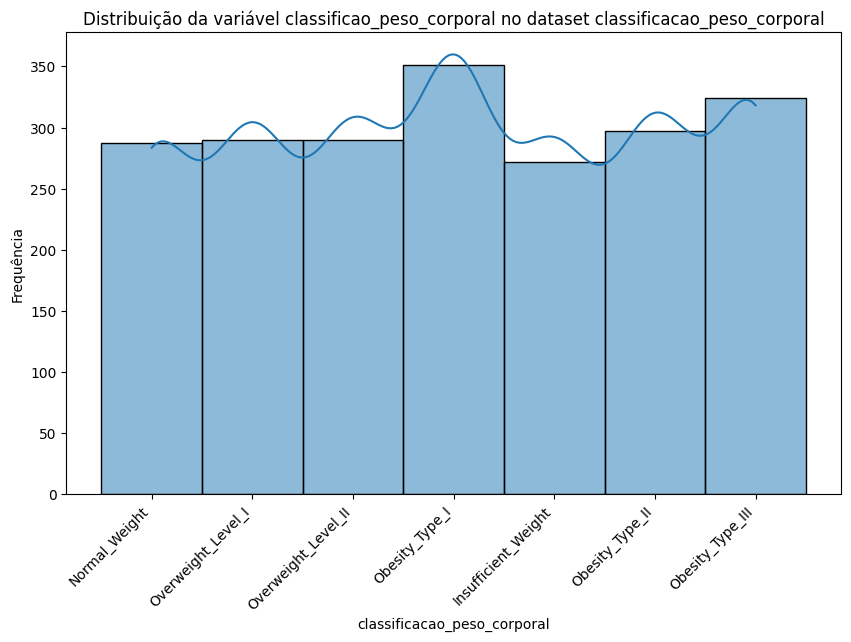

In [267]:
titulo_histograma_classificacao_peso_corporal = 'Distribuição da variável classificao_peso_corporal no dataset classificacao_peso_corporal'
histograma_classificacao_peso_corporal = gera_histograma(df, 'classificacao_peso_corporal', titulo_histograma_classificacao_peso_corporal)

### **nivel_obesidade por genero**

In [268]:
# Mapeamento dos nomes originais para português
mapa_nomes_pt = {
    'Normal_Weight': 'peso_normal',
    'Overweight_Level_I': 'sobrepeso_tipo_1',
    'Overweight_Level_II': 'sobrepeso_tipo_2',
    'Obesity_Type_I': 'obesidade_tipo_1',
    'Insufficient_Weight': 'peso_insuficiente',
    'Obesity_Type_II': 'obesidade_tipo_2',
    'Obesity_Type_III': 'obesidade_tipo_3'
}

# Aplicar o mapeamento à coluna classificacao_peso_corporal no DataFrame df
df['classificacao_peso_corporal'] = df['classificacao_peso_corporal'].map(mapa_nomes_pt)

# Agrupar por classificacao_peso_corporal e contar a ocorrência de cada gênero
classificao_peso_corporal_genero_counts = round(df.groupby('classificacao_peso_corporal')['genero'].value_counts(normalize=True).mul(100).reset_index(name='porcentagem'),2)

# Pivotar a tabela para ter as quantidades de feminino e masculino como colunas
classificao_peso_corporal_genero_pivot = classificao_peso_corporal_genero_counts.pivot(index='classificacao_peso_corporal', columns='genero', values='porcentagem').reset_index()

# Renomear as colunas para o formato desejado
classificao_peso_corporal_genero_pivot.columns = ['classificacao_peso_corporal', 'qtde_feminino', 'qtde_masculino']

# Definir a ordem desejada para as categorias de classificacao_peso_corporal
ordem_classificao_peso_corporal = [
    'peso_insuficiente',
    'peso_normal',
    'sobrepeso_tipo_1',
    'sobrepeso_tipo_2',
    'obesidade_tipo_1',
    'obesidade_tipo_2',
    'obesidade_tipo_3'
]

# Converter a coluna 'classificacao_peso_corporal' para tipo categórico com a ordem definida
classificao_peso_corporal_genero_pivot['classificacao_peso_corporal'] = pd.Categorical(
    classificao_peso_corporal_genero_pivot['classificacao_peso_corporal'],
    categories=ordem_classificao_peso_corporal,
    ordered=True
)

# Ordenar o DataFrame pela ordem das categorias de classificacao_peso_corporal
classificao_peso_corporal_genero_pivot = classificao_peso_corporal_genero_pivot.sort_values('classificacao_peso_corporal').reset_index(drop=True)

# Exibir o novo DataFrame
display(classificao_peso_corporal_genero_pivot)

,classificacao_peso_corporal,qtde_feminino,qtde_masculino
0,peso_insuficiente,63.60,36.40
1,peso_normal,49.13,50.87
2,sobrepeso_tipo_1,50.00,50.00
3,sobrepeso_tipo_2,35.52,64.48
4,obesidade_tipo_1,44.44,55.56
5,obesidade_tipo_2,0.67,99.33
6,obesidade_tipo_3,99.69,0.31


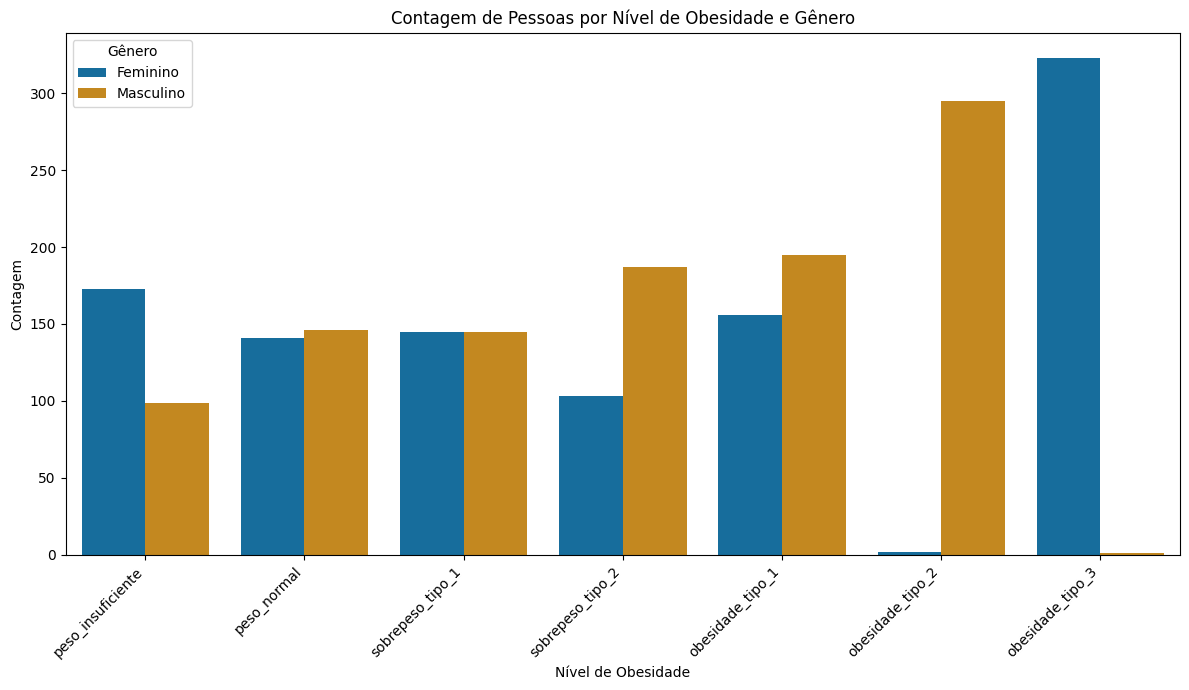

In [269]:
plt.figure(figsize=(12, 7))
# O 'obesidade' coluna no DataFrame df agora contem os valores em português devido a execução da celula wuA3dd51hF-a
sns.countplot(data=df, x='classificacao_peso_corporal', hue='genero', palette='colorblind', order=ordem_classificao_peso_corporal)

# Definir a ordem desejada para as categorias de obesidade em português para o eixo x
ordem_classificao_peso_corporal = [
    'peso_insuficiente',
    'peso_normal',
    'sobrepeso_tipo_1',
    'sobrepeso_tipo_2',
    'obesidade_tipo_1',
    'obesidade_tipo_2',
    'obesidade_tipo_3'
]
plt.xticks(ticks=range(len(ordem_classificao_peso_corporal)), labels=ordem_classificao_peso_corporal, rotation=45, ha='right')


plt.title('Contagem de Pessoas por Nível de Obesidade e Gênero')
plt.xlabel('Nível de Obesidade')
plt.ylabel('Contagem')
plt.legend(title='Gênero', labels=['Feminino', 'Masculino']) # Ajustar rótulos da legenda
plt.tight_layout()
plt.show()

### **Distribuição da variável IMC na base**

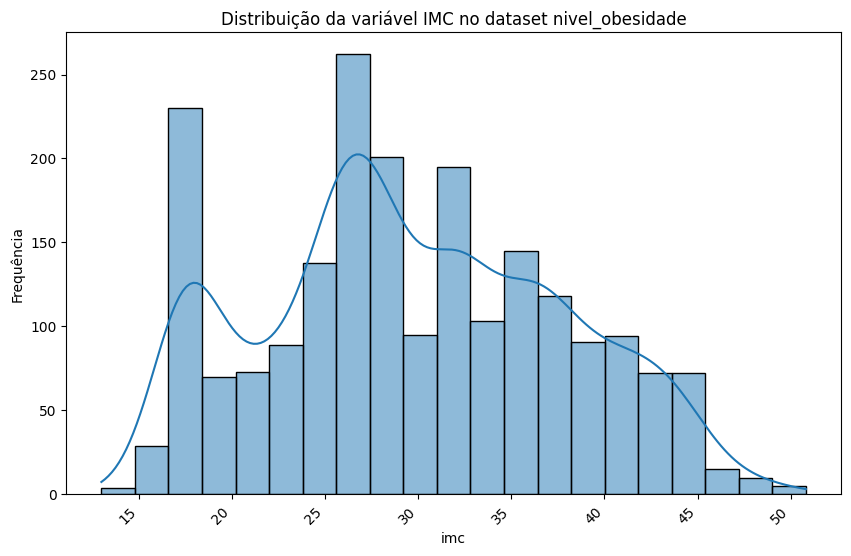

In [270]:
titulo_histograma_imc = 'Distribuição da variável IMC no dataset nivel_obesidade'
histograma_imc = gera_histograma(df, 'imc', titulo_histograma_imc)